## **Análise do Notebook de Segmentação de Clientes**

Este notebook apresenta um desafio de segmentação de clientes utilizando técnicas de agrupamento hierárquico. O objetivo principal é analisar dados de comportamento de compra de clientes de um e-commerce e segmentá-los em grupos com características similares para direcionar campanhas de marketing mais eficazes.

### **Contexto do Projeto**
O projeto simula um cenário onde você trabalha no setor de marketing de uma empresa de e-commerce e recebeu uma base de dados contendo informações sobre o comportamento de compra dos clientes. A base de dados utilizada é o Mall_Customers.csv, que contém as seguintes colunas:

- `CustomerID` : identificador único do cliente
- `Gender` : gênero do cliente
- `Age` : idade do cliente
- `Annual Income (k$)` : renda anual em milhares de dólares
- `Spending Score (1-100)` : índice de gastos baseado no comportamento e histórico de compras

O objetivo é aplicar técnicas de agrupamento hierárquico para identificar padrões naturais nos dados e segmentar os clientes em grupos distintos, permitindo estratégias de marketing personalizadas para cada segmento.
Estrutura do Notebook

O notebook está organizado nas seguintes seções principais:

- Importação de Bibliotecas: Carregamento das bibliotecas necessárias para análise de dados e visualização
- Carregamento e Exploração dos Dados: Leitura do arquivo CSV e visualização inicial dos dados
- Limpeza e Tratamento de Outliers: Detecção e tratamento de valores atípicos nas variáveis alvo
- Preparação dos Dados para Agrupamento: Normalização e transformação dos dados
- Análise de Agrupamento Hierárquico: Aplicação do algoritmo de agrupamento e visualização dos resultados
- Interpretação dos Segmentos: Análise e caracterização dos grupos identificados.
- Estratégias de Marketing Baseadas em Segmentação: Explora como utilizar os resultados da segmentação de clientes para desenvolver estratégias de marketing personalizadas e eficazes para cada grupo identificado.

Este notebook demonstra um fluxo de trabalho completo para segmentação de clientes, desde a preparação dos dados até a interpretação dos resultados finais.

### **Seção 1: Importação de Bibliotecas**
Nesta seção inicial, o notebook importa as bibliotecas necessárias para realizar a análise de segmentação de clientes. Vamos entender o que cada biblioteca faz:

In [31]:
#Importação das bibliotecas necessárias bem como desativar os avisos (Warnings)
import pandas as pd
import seaborn as sn
import estatistica as st
from scipy.stats import zscore
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

### Explicação das bibliotecas utilizadas:

- **pandas (pd)** : Biblioteca fundamental para manipulação e análise de dados, utilizada para carregar, transformar e analisar o conjunto de dados dos clientes.
- **seaborn (sn)** : Biblioteca de visualização de dados baseada em matplotlib, utilizada para criar gráficos estatísticos informativos, como os boxplots para detecção de outliers.
- **estatistica (st)** : Parece ser um módulo personalizado que contém funções estatísticas específicas para este projeto, como o teste de normalidade Kolmogorov-Smirnov utilizado posteriormente.
- **scipy.stats.zscore** : Função para calcular o z-score (padronização) dos dados, transformando-os para que tenham média 0 e desvio padrão 1, o que é importante para o algoritmo de agrupamento.
- **warnings** : Módulo para controlar mensagens de aviso. Neste caso, os avisos são desativados para manter a saída do notebook limpa e focada nos resultados principais.

A desativação dos avisos (warnings) é uma prática comum quando se trabalha com bibliotecas que podem gerar muitos avisos que não são críticos para a análise, como avisos de depreciação ou mudanças futuras em APIs.

### **Seção 2: Carregamento e Exploração dos Dados**
Nesta seção, o notebook realiza o carregamento dos dados do arquivo CSV e faz uma exploração inicial para entender a estrutura e conteúdo do conjunto de dados.

In [32]:
#Vizualização do Banco de dados
dados = pd.read_csv('Mall_Customers.csv')

In [33]:
dados.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Explicação do processo:
O comando `pd.read_csv('Mall_Customers.csv')` carrega o arquivo CSV chamado "Mall_Customers.csv" em um DataFrame do pandas chamado "dados". Este arquivo contém informações sobre os clientes de um shopping mall.
Em seguida, o método `head()` é utilizado para visualizar as primeiras 5 linhas do DataFrame, o que permite uma rápida inspeção da estrutura dos dados. A saída mostra que o conjunto de dados contém as seguintes colunas:

- **CustomerID**: Identificador único para cada cliente
- **Gender**: Gênero do cliente (Male/Female)
- **Age**: Idade do cliente
- **Annual Income (k$)**: Renda anual em milhares de dólares
- **Spending Score (1-100)**: Pontuação de gastos em uma escala de 1 a 100

Esta visualização inicial é crucial para entender a estrutura dos dados antes de prosseguir com análises mais complexas. Podemos observar que os dados estão bem estruturados, com cada linha representando um cliente e cada coluna representando um atributo específico desse cliente.
A exploração inicial dos dados é um passo fundamental em qualquer projeto de análise de dados, pois permite ao analista entender a natureza dos dados com os quais está trabalhando e planejar as etapas subsequentes da análise de forma mais eficaz.

### **Seção 3: Limpeza e Detecção de Outliers**
Esta seção do notebook é dedicada à detecção e análise de outliers (valores atípicos) nas variáveis alvo que serão utilizadas para a segmentação de clientes: `Annual Income (k$)` e `Spending Score (1-100)`.

### Explicação da metodologia de detecção de outliers
O notebook apresenta uma explicação detalhada sobre como detectar outliers usando o método da **Amplitude Inter-Quartil (AIQ/IQR)**. Este método classifica os outliers em duas categorias:

### Outliers moderados:

- Valores abaixo de: Q1 - 1,5*AIQ
- Valores acima de: Q3 + 1,5*AIQ

### Outliers extremos:

- Valores abaixo de: Q1 - 3*AIQ
- Valores acima de: Q3 + 3*AIQ

Onde:

- Q1 é o primeiro quartil (25% dos dados estão abaixo dele)
- Q3 é o terceiro quartil (75% dos dados estão abaixo dele)
- AIQ = Q3 - Q1 (Amplitude Inter-Quartil)

### Análise de outliers para Annual Income (k$)

<Axes: ylabel='Annual Income (k$)'>

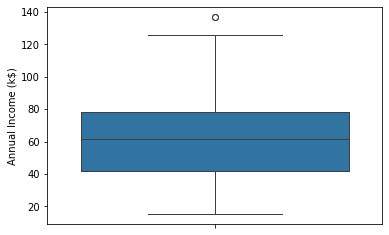

In [34]:
#Detectar outliers por meio do boxplot
sn.boxplot(dados['Annual Income (k$)'])

O boxplot é uma ferramenta visual eficaz para identificar outliers. A visualização mostra a distribuição da renda anual dos clientes e destaca possíveis valores atípicos.

In [35]:
#Detectar outliers moderados e extremos
dados['Annual Income (k$)'].describe()

count    200.000000
mean      60.560000
std       26.264721
min       15.000000
25%       41.500000
50%       61.500000
75%       78.000000
max      137.000000
Name: Annual Income (k$), dtype: float64

A função `describe()` fornece estatísticas descritivas da variável, incluindo os quartis necessários para o cálculo de outliers:

- 25% (Q1): 41.5
- 75% (Q3): 78.0

In [36]:
AIQ = 78 - 41.5
AIQ = 3*AIQ
outlier = 78 + AIQ
outlier

187.5

Aqui, o código calcula o limite para outliers extremos:

- AIQ = 78 - 41.5 = 36.5
- AIQ para outliers extremos = 3 * 36.5 = 109.5
- Limite superior para outliers extremos = 78 + 109.5 = 187.5

Como o valor máximo de Annual Income (137) é menor que 187.5, não há outliers extremos nesta variável.

### Análise de outliers para Spending Score (1-100)

<Axes: ylabel='Spending Score (1-100)'>

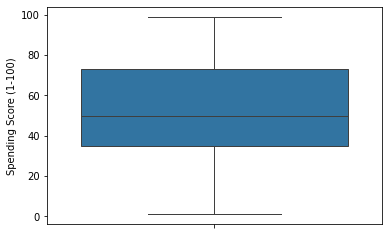

In [37]:
sn.boxplot(dados['Spending Score (1-100)'])

De forma similar, o boxplot para Spending Score é utilizado para visualizar a distribuição e identificar possíveis outliers.
A conclusão desta seção é que não foram detectados outliers extremos em nenhuma das duas variáveis analisadas, portanto não foi necessário realizar tratamento de outliers. Esta é uma informação importante, pois indica que os dados estão relativamente bem distribuídos e não há valores que possam distorcer significativamente os resultados da análise de agrupamento.

### **Seção 4: Preparação dos Dados para Agrupamento**
Nesta seção, o notebook realiza a preparação dos dados para a análise de agrupamento hierárquico. A preparação adequada dos dados é crucial para obter resultados significativos em algoritmos de agrupamento.

### Teste de Normalidade

<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

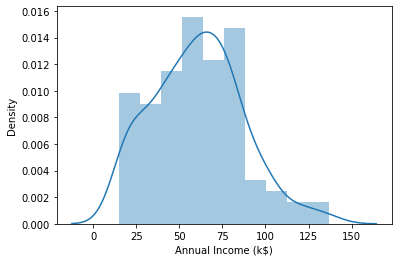

In [38]:
sn.distplot(dados['Annual Income (k$)'])

In [39]:
pvalue = st.teste_normalidade_ks(dados, colunas=['Annual Income (k$)'])
pvalue['Annual Income (k$)']

0.6006202059235106

Aqui, é realizado um teste de normalidade Kolmogorov-Smirnov para verificar se a variável `Annual Income (k$)` segue uma distribuição normal. O p-value resultante (0.6006) é maior que 0.05, o que indica que não podemos rejeitar a hipótese nula de que os dados seguem uma distribuição normal.

<Axes: xlabel='Spending Score (1-100)', ylabel='Density'>

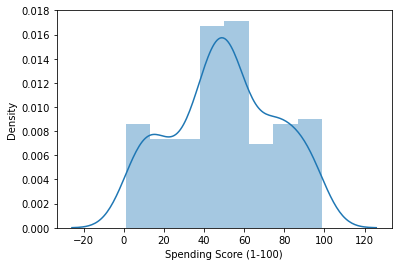

In [40]:
sn.distplot(dados['Spending Score (1-100)'])

In [41]:
pvalue = st.teste_normalidade_ks(dados, ['Spending Score (1-100)'])
pvalue['Spending Score (1-100)']

0.3273645952589408

Aqui, é realizado um teste de normalidade Kolmogorov-Smirnov para verificar se a variável `Spending Score (1-100)` segue uma distribuição normal. O p-value resultante (0.3273) é maior que 0.05, o que indica que não podemos rejeitar a hipótese nula de que os dados seguem uma distribuição normal.

### Seleção das Variáveis Alvo

In [42]:
colunasAlvos = dados[['Annual Income (k$)','Spending Score (1-100)']]

In [43]:
colunasAlvos.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


Nesta etapa, são selecionadas as duas variáveis que serão utilizadas para o agrupamento: `Annual Income (k$)` e `Spending Score (1-100)`. Estas variáveis foram escolhidas porque representam aspectos importantes do comportamento de compra dos clientes - quanto eles ganham e quanto eles gastam.

### Normalização dos Dados com Z-Score

In [44]:
colunasAlvos = zscore(colunasAlvos)

A normalização dos dados é um passo essencial antes de aplicar algoritmos de agrupamento. O método Z-Score transforma os dados para que tenham média 0 e desvio padrão 1. Isso é importante porque:

- Elimina o efeito de diferentes escalas entre as variáveis
- Garante que todas as variáveis contribuam igualmente para o processo de agrupamento
- Melhora a performance e a interpretabilidade dos resultados

Após a normalização, podemos ver que os valores foram transformados:

In [45]:
colunasAlvos.head()

,Annual Income (k$),Spending Score (1-100)
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


### Renomeação das Colunas Normalizadas

In [46]:
colunasAlvos = colunasAlvos.rename(columns={'Annual Income (k$)':'Annual Income (k$) (zscore)', 
                                            'Spending Score (1-100)':'Spending Score (1-100) (zscore)'})

As colunas são renomeadas para indicar claramente que contêm valores normalizados pelo método Z-Score.

### Concatenação com o DataFrame Original

In [47]:
dados = pd.concat([dados, colunasAlvos], axis=1)

In [48]:
dados.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Annual Income (k$) (zscore),Spending Score (1-100) (zscore)
0,1,Male,19,15,39,-1.738999,-0.434801
1,2,Male,21,15,81,-1.738999,1.195704
2,3,Female,20,16,6,-1.700830,-1.715913
3,4,Female,23,16,77,-1.700830,1.040418
4,5,Female,31,17,40,-1.662660,-0.395980


Finalmente, as colunas normalizadas são adicionadas ao DataFrame original, mantendo todas as informações em um único conjunto de dados. Isso permite comparar facilmente os valores originais com os valores normalizados e facilita a análise posterior.
Esta etapa de preparação dos dados é fundamental para garantir que o algoritmo de agrupamento hierárquico funcione corretamente e produza resultados interpretáveis e úteis para a segmentação de clientes.

### **Seção 5: Análise de Agrupamento Hierárquico**
Esta seção aborda a implementação do algoritmo de agrupamento hierárquico para segmentar os clientes em grupos com características similares.

## Conceito de Agrupamento Hierárquico
O agrupamento hierárquico é uma técnica de aprendizado não supervisionado que agrupa dados semelhantes em clusters. Diferentemente de outros métodos como K-means, o agrupamento hierárquico não requer que o número de clusters seja especificado antecipadamente. Em vez disso, ele cria uma hierarquia de clusters que pode ser visualizada como um dendrograma.

## Implementação no Notebook
No notebook, o agrupamento hierárquico é implementado utilizando a função personalizada `agrupamento_hierarquico()` do módulo **estatistica.py**. Esta função oferece várias opções para personalizar o processo de agrupamento:

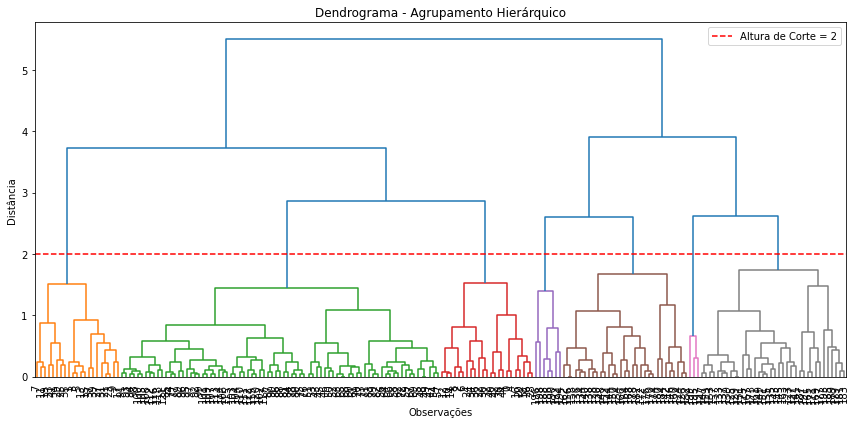

Clusters formados: 7


array([3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 2,
       3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 7, 5, 7, 5, 7, 5, 7, 5, 7,
       5, 7, 5, 7, 5, 7, 5, 7, 5, 7, 5, 7, 5, 7, 5, 7, 5, 7, 5, 7, 5, 7,
       5, 7, 5, 7, 5, 7, 5, 7, 5, 7, 5, 7, 5, 7, 5, 7, 5, 7, 5, 7, 5, 7,
       5, 7, 5, 7, 5, 7, 5, 7, 5, 7, 4, 7, 4, 7, 4, 7, 4, 7, 4, 6, 4, 6,
       4, 6], dtype=int32)

In [49]:
st.agrupamento_hierarquico(dados, ['Annual Income (k$) (zscore)','Spending Score (1-100) (zscore)'],metodo='complete',distancia='euclidean',altura_corte=2,atribuir_ao_dataframe=None)

Parâmetros Importantes:

- **Método de Linkage**: O método `complete` mede a distância entre dois grupos como a maior distância entre qualquer par de pontos, um de cada grupo.
- **Métrica de Distância**: A distância euclidiana é a métrica padrão para dados contínuos como renda e pontuação de gastos.

## Visualização e Interpretação dos Resultados
Após a execução do agrupamento, os resultados são visualizados de duas formas principais:
- **Dendrograma**: Mostra a hierarquia dos clusters e como os dados são agrupados em diferentes níveis. A altura das linhas no dendrograma representa a distância entre os clusters.
- **Gráfico de Dispersão com Clusters**: Visualiza os clientes no espaço bidimensional de renda anual e pontuação de gastos, coloridos de acordo com seus clusters atribuídos.

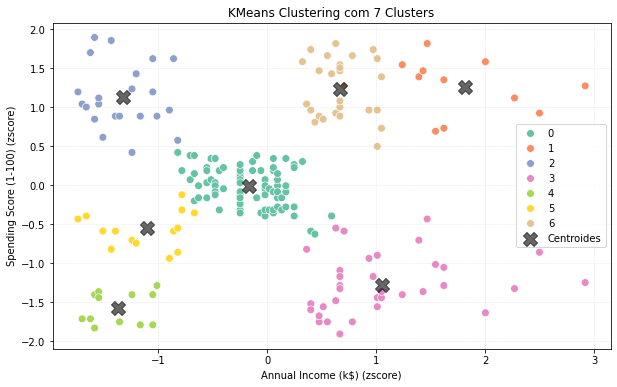

In [50]:
model = st.kmeans_cluster_plot(dados, 'Annual Income (k$) (zscore)','Spending Score (1-100) (zscore)',n_clusters=7, add_cluster_column=True)

In [51]:
dados = dados.drop(columns=['Annual Income (k$) (zscore)','Spending Score (1-100) (zscore)'])
dados.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,5
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,5


## **Seção 6: Interpretação dos Segmentos de Clientes**
Após a segmentação, cada cluster é analisado para identificar suas características distintivas:

- **Cluster 0**: Clientes com renda razoável e comportamento de consumo equilibrado. Compram com frequência moderada e tendem a ser estáveis. - "Consumidores Moderados"
- **Cluster 1**: Clientes de alta renda e alto engajamento. São os mais valiosos para a empresa — gastam bem e frequentemente. Devem ser prioridade em campanhas VIP ou de fidelização. - "Clientes Premium"
- **Cluster 2**: Apesar da renda baixa, são muito engajados. Possivelmente veem valor nos produtos ou são muito fiéis. Podem ser bons alvos para programas de fidelidade e promoções acessíveis. - "Compradores Entusiasmados"
- **Cluster 3**: Ganham bem, mas não gastam na loja. Talvez não vejam valor nos produtos ou não estejam bem segmentados. Ótimos candidatos para campanhas de reconquista ou personalização. - "Potenciais Perdidos"
- **Cluster 4**: Pouco engajados e com baixo poder de compra. Não são prioridade no momento, mas podem ser explorados com ofertas muito acessíveis ou campanhas locais. - "Clientes Desconectados"
- **Cluster 5**: Compram de forma consciente e limitada. Costumam responder bem a promoções e cupons. Um público bom para ações promocionais específicas. - "Consumidores Econômicos"
- **Cluster 6**: Clientes com boa renda e alto engajamento - "Fieis de Classe Média"

Esta segmentação permite que a equipe de marketing desenvolva estratégias personalizadas para cada grupo, maximizando o retorno sobre o investimento em campanhas de marketing.

## **Seção 7: Estratégias de Marketing Baseadas em Segmentação**

Esta seção explora como utilizar os resultados da segmentação de clientes para desenvolver estratégias de marketing personalizadas e eficazes para cada grupo identificado.

## Aplicação Prática da Segmentação de Clientes
A segmentação de clientes não é apenas um exercício analítico, mas uma ferramenta estratégica poderosa que permite às empresas:

- Personalizar comunicações e ofertas
- Alocar recursos de marketing de forma mais eficiente
- Desenvolver produtos e serviços direcionados
- Melhorar a experiência do cliente e aumentar a fidelidade

## Estratégias para Cada Segmento

Baseado na segmentação realizada no notebook, podemos desenvolver estratégias específicas para cada cluster identificado:

## Cluster 0: Consumidores Moderados
**Perfil**: Clientes com renda razoável e comportamento de consumo equilibrado. Compram com frequência moderada e tendem a ser estáveis:

- Oferecer combos promocionais ou benefícios progressivos para estimular aumento de ticket médio.

## Cluster 1: Clientes Premium
**Perfil**: Clientes de alta renda e alto engajamento. São os mais valiosos para a empresa — gastam bem e frequentemente. Devem ser prioridade em campanhas VIP ou de fidelização.

- Criar um programa de fidelidade VIP, acesso antecipado a novos produtos, e comunicação personalizada.

## Cluster 2: Compradores Entusiasmados
**Perfil**: Apesar da renda baixa, são muito engajados. Possivelmente veem valor nos produtos ou são muito fiéis. Podem ser bons alvos para programas de fidelidade e promoções acessíveis.

- Desenvolver promoções acessíveis e descontos progressivos, além de reconhecer a lealdade com brindes.


## Cluster 3: Potenciais Perdidos
**Perfil**: Ganham bem, mas não gastam na loja. Talvez não vejam valor nos produtos ou não estejam bem segmentados. Ótimos candidatos para campanhas de reconquista ou personalização.

- Investir em remarketing, pesquisas de satisfação e ações de reconquista com ofertas personalizadas.

## Cluster 4: Clientes Desconectados

**Perfil**: Pouco engajados e com baixo poder de compra. Não são prioridade no momento, mas podem ser explorados com ofertas muito acessíveis ou campanhas locais.

- Aplicar campanhas educativas sobre os benefícios da marca e oferecer cupons agressivos de primeira compra.

## Cluster 5: Consumidores Econômicos

**Perfil**: Compram de forma consciente e limitada. Costumam responder bem a promoções e cupons. Um público bom para ações promocionais específicas.

- Focar em ofertas-relâmpago, kits promocionais e parcelamentos atrativos.

## Cluster 6: Fieis de Classe Média

**Perfil**: Clientes com boa renda e alto engajamento

- Recompensar com experiências exclusivas, descontos por indicação, e manter comunicação contínua.

## **Implementação e Mensuração**
Para implementar efetivamente estas estratégias, é importante:

- **Estabelecer KPIs claros** para cada segmento
- **Criar um plano de comunicação específico** para cada segmento
- **Testar e otimizar** continuamente as abordagens através de testes A/B
- **Monitorar a evolução dos segmentos** ao longo do tempo

Criar um plano de comunicação específico para cada segmento
Testar e otimizar continuamente as abordagens através de testes A/B
Monitorar a evolução dos segmentos ao longo do tempo: